# Description
Imagine that you're working on an application to track boats as they travel across the ocean.  For this application, you're given a square map with a fixed size (i.e. 2000x2000), and a set of coordinates that represent the ship's path across the map.  You can assume the ship's path will be entirely within the bounds of the map.  The path *can* include the very edge of the map.

However, viewing the entire map at once means the ship's path is quite small.  Your task is to write an algorithm that outputs a smaller square area that contains the ship's path.  This smaller area will be used to display the path on a viewing terminal.  

Your boss has asked for the following features:
* The entire path must be contained within the output area.
* The smaller area must not extend beyond the edge of the larger map.
* Because the viewing terminal display is square, the output bounds must be square.
* If possible, add a 30 pixel border around the path, so the path doesn't go right to the edge of the screen.  If a point is within 30 pixels of the edge, go up to the edge.
* The path should be centered within the smaller bounds, when possible.

**NOTE:**  These requirements are listed in order of importance.  The output being square is more important than the 30 pixel border, etc.  This means there may be cases where 30px border is not possible (the path is very close to an edge of the map), or where it's not possible to be centered (path is in a corner of the map), etc.

**NOTE:** I have a solution to generate the chalenge outputs.  Depending how you do centering, the results might be off by a pixel or two.  It doesn't have to be exact.


# Input Description
You will be given the following pieces of information separated by a comma:

1. Size of map
3. Set of points that describe the path of the ship

*Example:*

    2000, [(1000,1500),(1200, 1500),(1400,1600),(1600,1800)]


# Output Description
Your program should output a bounding square that contains all of the points in the format:

1. Lower left corner coordinates (X, Y)
2. Size of bounding box        

*Example:*

    (970, 1320), 660

# Challenge Inputs

    2000, [(600, 600), (700, 1200)]
    2000, [(300, 300), (1300, 300)]
    2000, [(825, 820), (840, 830), (830, 865), (835, 900)]
    

# Challenge Outputs

    (320, 570), 660
    (270, 0), 1060
    (763, 790), 140

Here are images of the challenge inputs/outputs:
1. [https://i.imgur.com/WZ39Vlf.png](https://i.imgur.com/WZ39Vlf.png)
2. [https://i.imgur.com/HyMh3wv.png](https://i.imgur.com/HyMh3wv.png)
3. [https://i.imgur.com/M23z5gZ.png](https://i.imgur.com/M23z5gZ.png)

    
## Edge Cases
Here are some extra test cases that will test the literal edge and corner cases for this problem.

    # along the sides of the map, should push square towards the center
    5079, [(5079, 2000), (5079, 3000)]
    5079, [(10, 2000), (10, 3000)]
    5079, [(2000, 10), (3000, 10)]
    5079, [(2000, 5079), (3000, 5079)]

    # corners
    5079, [(0, 0), (600, 600)]
    5079, [(5079, 5079), (4479, 4479)]
    5079, [(0, 5079), (600, 4479)]
    5079, [(5079, 0), (4479, 600)]

    # entire width
    5079, [(1000, 0), (1000, 5079)]

    # entire height
    5079, [(0, 1000), (5079, 1000)]

    # entire area
    5079, [(0, 0), (5079, 5079)]


## Edge Cases Outputs

    (4019, 1970), 1060)
    (0, 1970), 1060)
    (1970, 0), 1060)
    (1970, 4019), 1060)
    (0, 0), 660)
    (4419, 4419), 660)
    (0, 4419), 660)
    (4419, 0), 660)
    (0, 0), 5079)
    (0, 0), 5079)
    (0, 0), 5079)


In [22]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [23]:
def find_path_bounds(map_size,  # pylint: disable=too-many-locals
                     coords,
                     crop_border=30,
                     min_size=0):
    """
    This function should provide a bounding box that contains the current coordinates of the
    path for display, and does not exceed the bounds of the map.
    To be aesthetically pleasing , the bounds provided shall be:
        - square to prevent distortion, as the preview box will be square
        - not smaller than the provided minimum size to prevent too much zoom
        - equally padded from the boundaries of the path (in the x and y directions)
    :return: (x, y, height, width)
    """
    if coords:
        filtered_coords = [coord for coord in coords if coord is not None]

        if filtered_coords:
            x_list, y_list = zip(*filtered_coords)

            # First, the area of interest should be defined.  This is the area that absolutely
            # needs to be displayed because it has all the coordinates in it.  It's OK for out of
            # bounds here, this will be resolved later.
            min_x = min(x_list) - crop_border
            max_x = max(x_list) + crop_border
            min_y = min(y_list) - crop_border
            max_y = max(y_list) + crop_border

            # Determine the width that the coordinates occupy in the x and y directions.  These
            # are used to determine the final size of the bounds.
            x_path_width = max_x - min_x
            y_path_width = max_y - min_y

            # The size of the final output will be a square, so we need to find out the largest
            # of the possible sizes for the final output.  MIN_BOUNDS_SIZE is the lower bound
            # for how small the output map can be.  The final output bounds also can't be larger
            # than the entire map.
            output_size = min(max(min_size, x_path_width, y_path_width), map_size)

            # Each side is now padded to take up additional room in the smaller direction.
            # If a particular direction was chosen to the be the output size, the padding in that
            # direction will be 0.
            x_corner = min_x - (output_size - x_path_width) // 2
            y_corner = min_y - (output_size - y_path_width) // 2

            # Bounds checks for the corners to make sure all of the bounds is within the map limits.
            x_corner = max(0, x_corner)
            y_corner = max(0, y_corner)
            x_corner = map_size - output_size if x_corner + output_size > map_size else x_corner
            y_corner = map_size - output_size if y_corner + output_size > map_size else y_corner

            return (int(x_corner), int(y_corner)), int(output_size)

    # If no frames have been processed yet, the full map should be displayed to show that
    # processing has begun.
    return (0, 0), map_size

In [24]:
def plot_path_bounds(size, coords):
    xy, bound_size = find_path_bounds(size, coords)
    print(xy, bound_size)
    fig, ax = plt.subplots(figsize=(10,10))

    ax.plot(*zip(*coords), linewidth=2)

    rect = patches.Rectangle(xy,bound_size,bound_size,linewidth=2,edgecolor='k',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    ax.set_xticks(np.arange(0, size+1, 500))
    ax.set_yticks(np.arange(0, size+1, 500))
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    plt.show()

(320, 570) 660


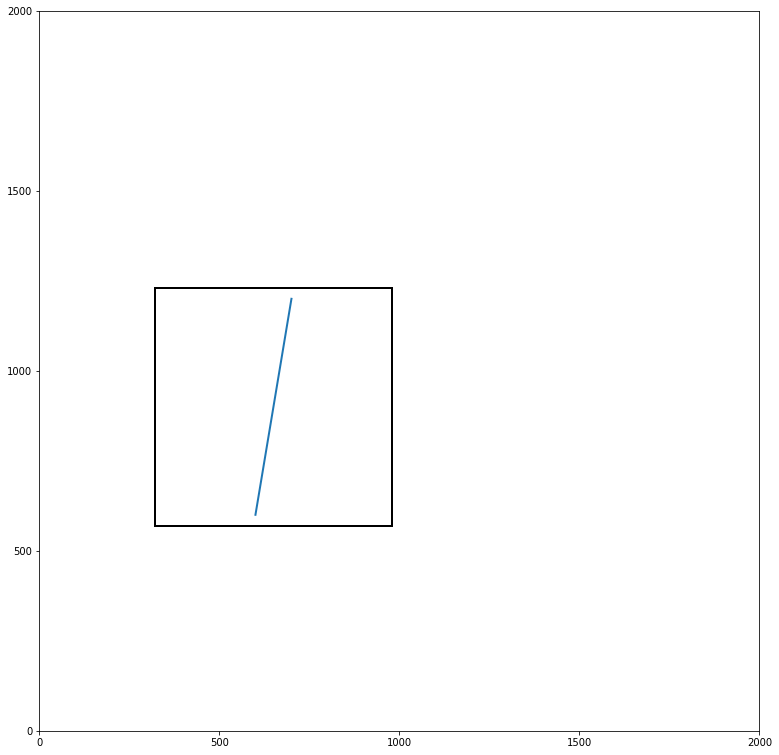

In [45]:
plot_path_bounds(2000, [(600, 600), (700, 1200)])

(270, 0) 1060


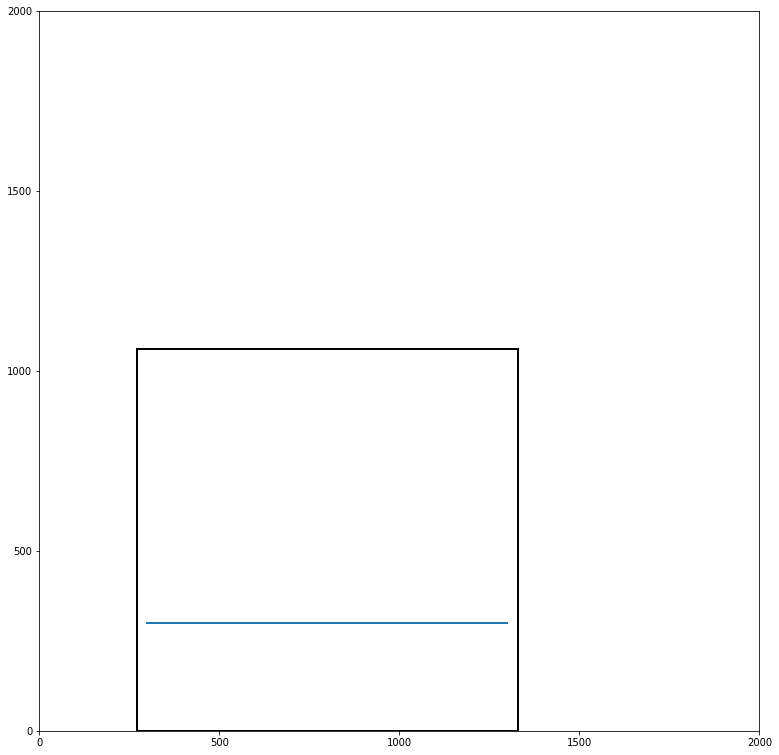

In [46]:
plot_path_bounds(2000, [(300, 300), (1300, 300)])

(763, 790) 140


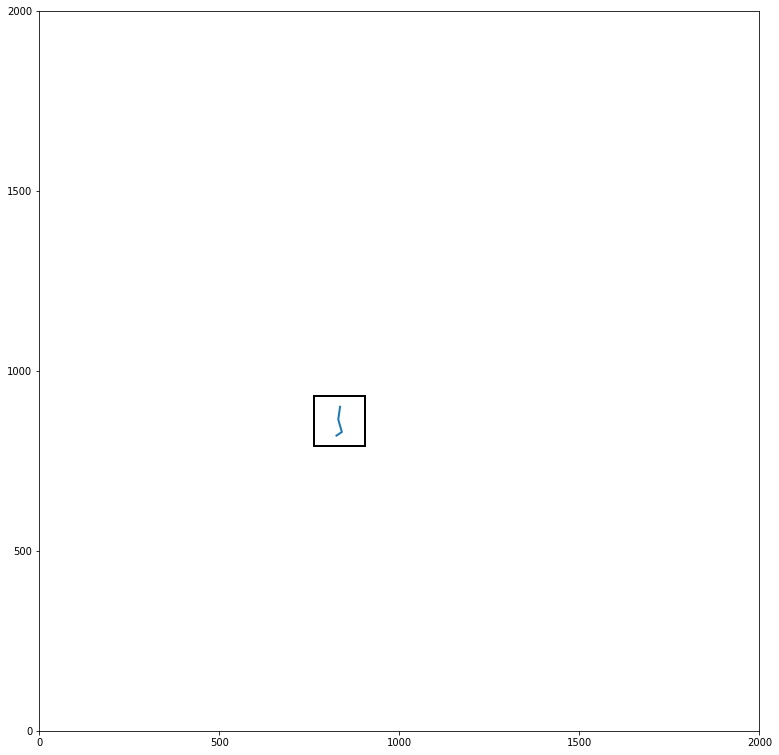

In [47]:
plot_path_bounds(2000, [(825, 820), (840, 830), (830, 865), (835, 900)])

In [43]:
FIND_PATH_BOUND_CASES = [

    (2000, [(600, 600), (700, 1200)], ((320, 570), 660)),
    (2000, [(300, 300), (1300, 300)], ((270, 0), 1060)),
    (2000, [(825, 820), (840, 830), (830, 865), (835, 900)], ((763, 790), 140)),
    

    # along the sides of the map, should push square towards the center
    (5079, [(5079, 2000), (5079, 3000)], ((4019, 1970), 1060)),
    (5079, [(10, 2000), (10, 3000)], ((0, 1970), 1060)),
    (5079, [(2000, 10), (3000, 10)], ((1970, 0), 1060)),
    (5079, [(2000, 5079), (3000, 5079)], ((1970, 4019), 1060)),

    # corners
    (5079, [(0, 0), (600, 600)], ((0, 0), 660)),
    (5079, [(5079, 5079), (4479, 4479)], ((4419, 4419), 660)),
    (5079, [(0, 5079), (600, 4479)], ((0, 4419), 660)),
    (5079, [(5079, 0), (4479, 600)], ((4419, 0), 660)),

    # entire width
    (5079, [(1000, 0), (1000, 5079)], ((0, 0), 5079)),

    # entire height
    (5079, [(0, 1000), (5079, 1000)], ((0, 0), 5079)),

    # entire area
    (5079, [(0, 0), (5079, 5079)], ((0, 0), 5079)),
]

In [44]:
for p in FIND_PATH_BOUND_CASES:
    print(find_path_bounds(p[0], p[1]) == p[2])


True
True
True
True
True
True
True
True
True
True
True
True
True
True
